我们的任务是要统计60万条文本包含了哪些主题（即这60万个法律问题中主要是有哪些类别的问题），也就是文本聚类任务。

# 数据探索
在正式处理数据之前，我们需要先看看任务数据是什么样的，之后才能根据需要处理数据。

In [7]:
#使用pandas库加载数据
import pandas as pd

df = pd.read_csv('法律问答.csv',sep=',',header = 0,encoding='utf8')
#查看数据的行列大小
df.shape

(601124, 6)

In [8]:
#查看数据信息：缺失值数量，列名称，每列的数据属性
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601124 entries, 0 to 601123
Data columns (total 6 columns):
id          601124 non-null int64
title       585043 non-null object
question    601124 non-null object
answer      601124 non-null object
cate        601124 non-null object
source      601124 non-null object
dtypes: int64(1), object(5)
memory usage: 27.5+ MB


In [9]:
#看看数据的内容
df.head()

,id,title,question,answer,cate,source
0,1,NaN,2016年6月，法院就李某与刘某民间借贷纠纷一案作出民事调解书，该调解书载明刘某于2016年...,执行权具有公权性质，应当遵循公权行使的一般原则即“法无授权皆禁止”。因此，执行程序中不能依据...,婚姻家庭,http://www.51wf.com/ask/question-127931.html
1,2,NaN,2015年1月，法院判决李某偿还张某借款15万元。判决生效后，李某一直未履行，张某遂向法院申...,法院可以强制执行李某法定继承遗产部分。本案中，在无遗嘱继承的情况下，作为法定继承人的李某享有...,遗产继承,http://www.51wf.com/ask/question-127887.html
2,3,NaN,请问律师，个人诈骗罪2017年的量刑标准是什么？我的一个朋友因为诈骗这个事情，被羁押在北京市...,"根据《中华人民共和国刑法(2011年修正)》第266条,【诈骗罪】诈骗公私财物,数额较大的,...",经济犯罪,http://www.51wf.com/ask/question-127835.html
3,4,NaN,浦东新区，新场镇，自2016年至今多次发生非法占用农田，用于堆放建筑污泥，多次向城管部门反映...,可以玩忽职守罪向检察院控告。根据《中华人民共和国刑法(2011年修正)》第397条，【滥用职...,其它,http://www.51wf.com/ask/question-127834.html
4,5,NaN,用刀刺瞎双眼判多少年。打架时候故意的。,涉嫌故意伤害罪，双目失明属于重伤一级。根据《中华人民共和国刑法(2011年修正)》第234条...,其它,http://www.51wf.com/ask/question-127833.html


我们可以看到，数据中有已经“cate”这一列，比如“婚姻家庭”，“遗产继承”等，也就是数据中已经有类别分了，那么现在我们要做的就是直接统计一下就行了。

In [10]:
#按“category”这一列统计
print("类别统计：\n",df['cate'].value_counts())
# print("类别数量：\n",len(df['cate'].value_counts()))

类别统计：
 婚姻家庭      102354
交通事故       69960
合同纠纷       54990
劳动纠纷       53643
债权债务       45997
刑事辩护       31746
人身损害       29610
综合咨询       27715
房产纠纷       27177
医疗纠纷       26349
拆迁安置       12877
离婚         12463
经济犯罪       10874
其他犯罪        7877
损害赔偿        7561
工伤赔偿        6368
电信通讯        5682
抵押担保        5412
暴力犯罪        5166
劳动劳务        4518
消费权益        3778
土地纠纷        3668
金融证券        3634
保险理赔        3333
遗产继承        3256
公司犯罪        2809
银行          2335
继承          2318
其它          1937
知识产权        1744
           ...  
国家赔偿          96
登记机构          87
并购重组          80
倾销垄断          74
民事诉讼          68
邮政储蓄          68
移民留学          67
海事海商          64
环境污染          63
税务登记          62
水利电力          61
监督机构          58
国际贸易          53
污染损害          43
个人独资          42
鉴定机构          37
评估机构          34
死刑辩护          26
反不正当竞争        25
合资合作          18
海关商检          18
合同审查          18
期货交易          12
新三板           10
票据             8
刑事自诉           7
兼并收购           5
私人律师   

可以看到婚姻家庭 ，交通事故 ，合同纠纷 ，劳动纠纷，债权债务 ，刑事辩护 ，人身损害 ，综合咨询 ，房产纠纷 ，医疗纠纷，离婚这几个类别比较多；而且总共有97个类别。

那么是不是到这里工作就做完了呢？应该没这么简单。。。比如数据**是不是有重复的？** **“cate”这列的填写是不是可靠的**（因为这一栏的类别都是问问题的人人为选择的，可能存在随意性或者其他错误）？

In [11]:
#进行去重
df = df[['question','cate']]
df = df.drop_duplicates()
print("类别统计：\n",df['cate'].value_counts())

类别统计：
 婚姻家庭      92190
交通事故      62706
合同纠纷      48968
劳动纠纷      48844
债权债务      42038
刑事辩护      27813
人身损害      27000
综合咨询      25686
房产纠纷      24876
医疗纠纷      22969
拆迁安置      11644
离婚        11242
经济犯罪      10268
其他犯罪       7478
损害赔偿       6723
工伤赔偿       5769
电信通讯       5262
抵押担保       5024
暴力犯罪       4731
劳动劳务       4076
消费权益       3457
土地纠纷       3317
保险理赔       3121
遗产继承       2877
公司犯罪       2562
银行         2156
继承         2094
其它         1880
金融证券       1608
职务犯罪       1529
          ...  
邮政储蓄         65
治安处罚         63
破产解散         59
移民留学         55
环境污染         54
水利电力         52
外商投资         41
污染损害         39
个人独资         32
登记机构         31
监督机构         28
反不正当竞争       24
死刑辩护         23
倾销垄断         19
海关商检         18
税务登记         17
合资合作         17
合同审查         16
海事海商         14
鉴定机构         12
期货交易         12
新三板           9
票据            8
刑事自诉          7
国际贸易          7
兼并收购          5
评估机构          3
私人律师          2
改制重组          1
公司解散          1
Name: cate, Lengt

In [12]:
#集中看看某一个类别下的问题，看是不是和我们上面做的猜想一致的
group = df.groupby('cate')
cate_ques = [x for x in group]
cate_ques[0][1]

,question,cate
1859,家人犯了非法狩猎罪，现在一审被判了，我们已经提起了上诉，想问二审会开庭审吗？,不当竞争
2555,亲属因为非法集资被关在北京市第一看守所，请问非法吸收公众存款48万的量刑标准是什么？他现在6...,不当竞争
3452,班主任老师强奸了15岁的学生，已经被学校控制住，该如何定罪？,不当竞争
4416,律师你好，微信上的朋友跟我借钱5千多，借的时候说啥什么时候还，但是到那个时候她都不还，每次找...,不当竞争
19099,共同受贿罪的从犯如何认定？如何量刑处罚？\r,不当竞争
21631,"我老公喝醉酒和被人发生口角,带几个人把对方打了,我老公构成寻衅滋事罪吗?能申请取保候审吗?",不当竞争
24582,"2015故意伤害致人轻伤没有赔偿了吗,法院说今年出了什么新的文件,没有赔偿。那这样不是很不公...",不当竞争
27843,我朋友是环境监管人员严重失职致财产损失二十万，构成环境监管失职罪吗？会被判刑吗？,不当竞争
29775,"我朋友以个人的名义,非法吸收五十人公款,构成非法吸收公众存款罪吗?能申请取保候审吗?",不当竞争
45950,拐骗儿童罪的责任形式是什么？,不当竞争


我们可以看到question这一列里有许多None，另外这个类别是“不当竞争”，但是可以看到，很多问题明显不是属于不当竞争这个类别的，比如“夫妻共有房屋只登记在一方名下，离婚时怎么处理？”，“当事人发现法院制作的调解书内容与自己所达成的调解协议不一致的，怎么处理？”等。

因此，这个数据表里的类别分类是不可信的，所以之前得到的类别统计也是不可靠的。现在考虑文本聚类来分类，并且提取出每个类别的关键词。首先进行数据预处理。

下面统计一下所有问题中，每个问题句子的长度。

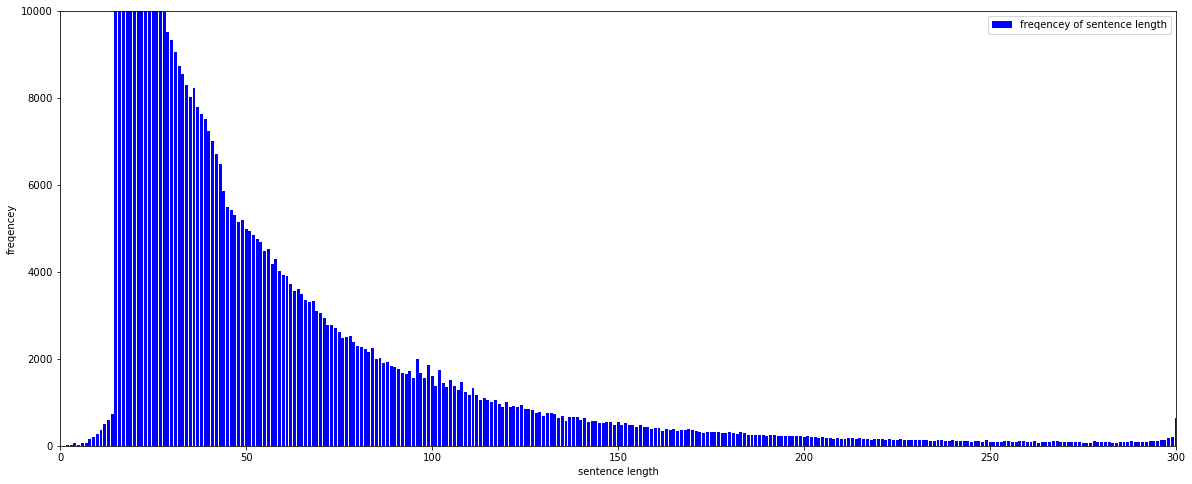

In [19]:
import matplotlib.pyplot as plt

sent_length = {}
for sentence in df['question']:
    length = len(sentence)
    if length not in sent_length.keys():
        sent_length[length] = 1
    else:
        sent_length[length] += 1
sent_length = sorted(sent_length.items(), key=lambda e:e[0], reverse=False)

sent_len = [x[0] for x in sent_length]
sent_num = [x[1] for x in sent_length]

plt.figure(figsize=(20,8))
plt.axis([0,300,0,10000])
plt.bar(sent_len,sent_num,label="freqencey of sentence length",color="blue",linewidth=1)
plt.xlabel("sentence length")
plt.ylabel("freqencey")
plt.legend()
plt.show()

# 数据预处理
数据预处理需要去除文本中的停用词，并且将数据格式调整为可以使用算法的格式，比如：
> 当事人 发现 法院 制作 的 调解书 内容 与 自己 所 达成 的 调解 协议 不 一致 的 ， 怎么 处理 ？

> 拐骗 儿童 罪 的 责任 形式 是 什么 ？

我们需要将语句进行分词处理，并且词与词之间需要用空格隔开。

我们使用k-means聚类算法，使用TFIDF值来构造文本向量。

In [ ]:
import jieba
import re
import pickle
from tqdm import tqdm

df = np.array(df)
stop_word = pickle.load(open('stop_word_list.pkl','rb'))
stop_word.extend(["您好","法律","律师","谢谢"])
vac=[]
train_data=[]
for ques in tqdm(df):
    if len(ques)>10: #语句长度小于10的，我们将其排除
        doc = ""
        ques = ques.strip()
        ques = re.sub('[a-zA-Z0-9]','',ques) #去掉语句中的数字和字母
        ques_cut = jieba.cut(ques)
        for word in ques_cut:
            if word not in stop_word:
                doc += word+' '
                if word not in vac:
                    vac.append(word)
        train_data.append(doc)
        
train_data_path = 'train_data2.pkl'
# with open(train_data_path,'w') as f:
#     for doc in train_data:
#         f.write(doc)
#         f.write('\n')
        
# with open('vac.txt','w') as f:
#     for word in vac:
#         f.write(word)
#         f.write('\n')

pickle.dump(train_data,open(train_data_path,'wb'))
pickle.dump(vac,open('vac.pkl','wb'))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.854 seconds.
Prefix dict has been built succesfully.


In [13]:
train_data = pickle.load(open('train_data2.pkl','rb'))
vac = pickle.load(open('vac.pkl','rb'))
print("词表字典大小：",len(vac))
print("训练数据文档数量：",len(train_data))

词表字典大小： 160397
训练数据文档数量： 535521


可以看到，问题数量从601124条减少到535521条。

去除停用词之后，53万文本中有160397个不同的词，也就是如果我们要构造词袋模型向量的话，那这个向量有160397维。

下面统计下这160397个词的频率，看看这些词数量是怎样的。然后做个词云展示，这样能直观的展示关键词。

In [14]:
def wordCount(filename):
    import pickle
    train_data = pickle.load(open(filename,'rb'))
    word_dict = {}
    for doc in train_data:
        doc_list = doc.strip().split(' ')
        for word in doc_list:
            if len(word)>1:
                if word not in word_dict.keys():
                    word_dict[word] = 1
                else:
                    word_dict[word] += 1

    return word_dict

In [15]:
word_count = wordCount('train_data2.pkl')
word_count = sorted(word_count.items(),key=lambda d: d[1], reverse=True) #按词频进行排序

#打印词频前50的词
i = 0
for i in range(50):
    print(word_count[i])

('离婚', 111318)
('公司', 85859)
('孩子', 70463)
('房子', 50090)
('赔偿', 48821)
('律师', 47097)
('起诉', 43890)
('男方', 42640)
('合同', 41395)
('朋友', 40494)
('工资', 39543)
('女方', 39258)
('法院', 34166)
('老公', 33742)
('情况', 33113)
('工作', 32827)
('您好', 30721)
('结婚', 28130)
('责任', 27980)
('我该', 26933)
('老板', 25722)
('两个', 25216)
('谢谢', 25138)
('上班', 23939)
('协议', 22901)
('单位', 21870)
('医院', 21522)
('父亲', 21168)
('同意', 20274)
('骨折', 19655)
('儿子', 18611)
('父母', 18599)
('工伤', 18543)
('贷款', 18524)
('小孩', 18316)
('法律', 17754)
('咨询', 17715)
('名字', 17619)
('财产', 17544)
('我家', 17512)
('一年', 17073)
('办理', 17008)
('申请', 16558)
('一个月', 15698)
('女儿', 15037)
('费用', 14956)
('期间', 14687)
('发生', 13537)
('劳动合同', 13453)
('母亲', 13450)


可以看到词频最大的是离婚，跟我们在数据探索部分看到的差不多，因为离婚是属于婚姻家庭类别的，而婚姻家庭类别有10万多条，另外离婚类别也有12000多条

In [26]:
#将词和数字映射，然后画图展示这些词的词频分布情况
word_id,freq = [],[]
for i in range(len(word_count)):
    word_id.append(i)
    freq.append(word_count[i][1])

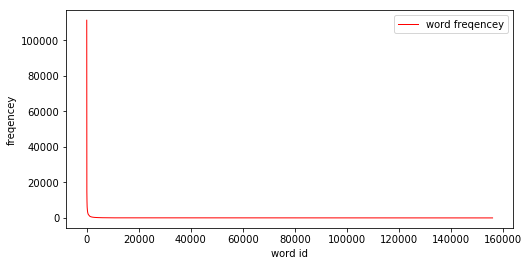

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(word_id,freq,label="word freqencey",color="red",linewidth=1)
plt.xlabel("word id")
plt.ylabel("freqencey")
plt.legend()
plt.show()

词频差距太大，少部分高达一两万，而大部分快要接近0了。因此我们考虑先去除词频过大的词，在看看词频分布。

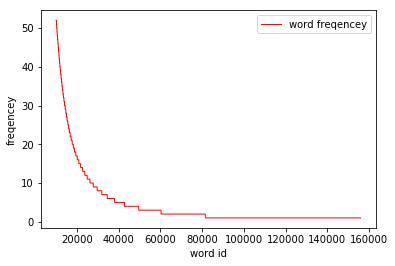

In [32]:
word_id2 = word_id[10000:]
freq2 = freq[10000:]
plt.plot(word_id2,freq2,label="word freqencey",color="red",linewidth=1)
plt.xlabel("word id")
plt.ylabel("freqencey")
plt.legend()
plt.show()

可以看到前30000个词的词频在5个以上，而后130000个词的词频在5个及5个以下。

In [36]:
#生成云图
from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS
from scipy.misc import imread

def generateCloud(filename,imagename,cloudname,fontname):  
    ''''' 
    生成标签云的函数 
    '''  
    coloring = imread(imagename)             # 读取背景图片  
    wc = WordCloud(background_color="white", # 背景颜色max_words=2000,# 词云显示的最大词数  
                   mask=coloring,            # 设置背景图片  
                   stopwords=STOPWORDS,      # 停止词  
                   font_path=fontname,       # 兼容中文字体  
                   max_font_size=150)        # 字体最大值  

    #计算好词频后使用generate_from_frequencies函数生成词云  
    #txtFreq例子为[('词a', 100),('词b', 90),('词c', 80)]  
    txtFreq = wordCount(filename)  
    wc.generate_from_frequencies(txtFreq)  
    return wc

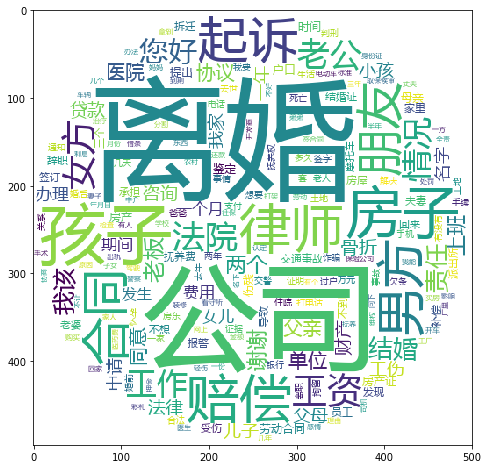

In [37]:
fontname = 'MSYH.TTF'     # 中文字体路径  
filename = 'train_data2.pkl'     # txt文件路径  
imagename = "20170204174813891.png"  # 背景图片路径  
cloudname = "cloud.png"   # 标签云路径  
wc = generateCloud(filename, imagename, cloudname,fontname)
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.show()

In [38]:
wc.to_file(cloudname) 